## Algorytmy genetyczne

Ewolucja prowadzi do powstawania bardzo skomplikowanych mechanizmów biologicznych, którymi często inspirują się inżynierowie. Już w 1950 roku Alan Turing zaproponował symulację procesu doboru naturalnego, gdzie "przetrwanie" osobnika zależy od tego, jak dobrze spełnia arbitralnie dobraną funkcję przetrwania, która może być dowolnie dobraną przez matematyka funkcją. W późniejszych pracach pomysł ten został rozwinięty w Algorytmy Genetyczne. W skrócie, ich koncepcję można przedstawić jako:

* Dysponujemy zbiorem osobników, z których każdy posiada _genotyp_ G, czyli zakodowane rozwiązanie problemu.

* Na początku osobniki mają losowe genotypy.

* Jakość osobnika określa funkcja przystosowania F(G). Osobniki są oceniane tylko na podstawie F(G), nie na podstawie G.

* W każdej iteracji algorytmu najlepsze osobniki (o najwyższej wartości funkcji przystosowania) rozmnażają się, a nowe algorytmy dziedziczą część genotypu po każdym z rodziców.

* W każdej iteracji przynajmniej część osobników z populacji jest zastąpiona nowymi osobnikami stworzonymi przez rozmnażanie się najlepszych osobników.

* W każdej iteracji mogą zajść małe, losowe mutacje w genotypie.

Przebieg algorytmu genetycznego można przedstawić na schemacie:

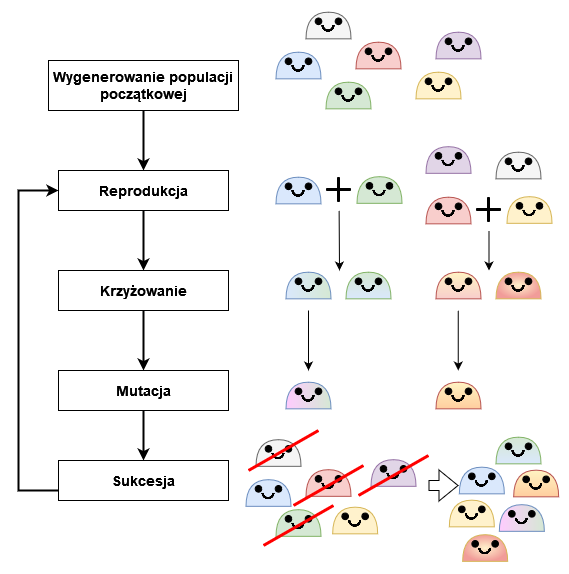

### Zastosowanie:

Ze względu na swój charakter typowymi zadaniami, w których algorytmy genetyczne znalazły zastosowanie, są zagadnienia związane z optymalizacją. 

Warto w tym miejscu wymienić zastosowania:

* w biznesie jako narzędzia optymalizacji kosztów i/lub zasobów w przedsiębiorstwie, szeregowania zadań, układania harmonogramów oraz modelowania finansowego;

* w zarządzaniu produkcją m.in. przy znajdowaniu odpowiednich parametrów dla maszyn, które potrzebują adekwatnych ilości surowców a jednocześnie konieczne jest ciągłe utrzymanie ich pracy;

* w lotnictwie, gdzie dostosowywano parametry konstrukcyjne skrzydeł do oporu oraz maksymalnej wagi i objętości paliwa;

* w transporcie przy znajdowaniu tras optymalnych, gdzie konieczne jest odwiedzenie przez kierowcę kilku punktów.



### Krótki słownik pojęć:


* Każdy osobnik posiada **genom** złożony z **chromosomów**. W najprostszym wypadku wystarczy nam 1 chromosom, będący wektorem zer lub jedynek o stałej długości. Genom **koduje** rozwiązanie problemu.

* **Funkcja przystosowania** określa jak dobrze osobnik jest przystosowany do środowiska. Jej argumentem jest genom osobnika, jej wyjściem - liczba rzeczywista.

* Podczas **reprodukcji** decydujemy, które osobniki będą mogły się rozmnożyć. O tym, jaka jest szansa rozmnożenia się osobnika, decyduje to, jak dobra jest wartość jego funkcji przystosowania. Najprostszą metodą reprodukcji jest **reprodukcja ruletkowa**, w której wagą do wylosowania jakiegoś osobnika jako rodzica jest wartość jego funkcji przystosowania.

* Podczas **krzyżowania** tworzymy nowe osobniki na podstawie wylosowanych par rodziców. Najprostszą metodą krzyżowania jest **krzyżowanie jednopunktowe**, w którym losujemy pozycję P z przedziału [0, długość chromosomu]. Dziecko odziedziczy geny na pozycjach (0, 1, ... P) po pierwszym rodzicu, a na pozycjach (P+1, P+2, ..., długość chromosomu) po drugim.

* Podczas **mutacji** dokonujemy małych losowych zmian w genach stworzonych dzieci, np. przez obrót bitu na losowej pozycji w chromosomie.

* Podczas **sukcesji** zastępujemy starą populację nową. W najprostszym przypadku po prostu usuwamy starą populację i na jej miejsce pojawia się populacja dzieci, ale w bardziej złożonych przypadkach można np. wybrać najlepsze osobniki, niezależnie od tego, czy są z nowej, czy starej populacji.

Krzyżowanie jednopunktowe zostało przedstawione poniżej:

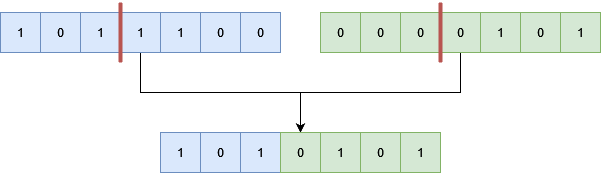

## Problemy rzeczywistoliczbowe

W problemach, w których chcemy, żeby chromosom był wektorem liczb rzeczywistych musimy zastosować odpowiednio bardziej złożone operatory mutacji i krzyżowania. Jeżeli każdy gen jest liczbą rzeczywistą, można skorzystać z krzyżowania typu blend. Jeżeli geny rodziców to $x_1, x_2, ..., x_n$ i $y_1, y_2, ..., y_n$, możemy stworzyć dziecko $u_1, u_2, ..., u_n$ losując każde $u_i$ z przedziału $[min(x_i, y_i)-\alpha(|x_i-y_i|), max(x_i, y_i)+\alpha(|x_i-y_i|)]$. Jest to tak zwane kodowanie typu blend.

Mutację natomiast można wykonać modyfikując losowy gen $x_i$ o liczbę z zakresu $[-0.1x_i, 0.1x_i]$

### Przykładowy problem

Chcemy znaleźć maksimum funkcji $f(x) = 3+0.3cos(25x-0.3)-(2x-0.2)^2$ na przedziale $[0,1]$. Można wyliczyć, że znajduje się ono w $x \approx 0.264828$ i wynosi ok. $ 3.29484$. Decydujemy, że zakodujemy rozwiązanie za pomocą wektora 16 bitów. Wektor będziemy interpretować jako liczbę w naturalnym systemie binarnym, a potem dzielić przez $2^{16}$, żeby otrzymać liczbę z przedziału $[0,1]$.

Implementacja algorytmów genetycznych jest często dokonywana przy użyciu programowania obiektowego. Jest to bardzo naturalne podejście, w którym każdy osobnik jest osobnym obiektem.



Możemy zobaczyć wygląd funkcji razem z jej ekstremum (użyty do tego został Wolfram Alpha):

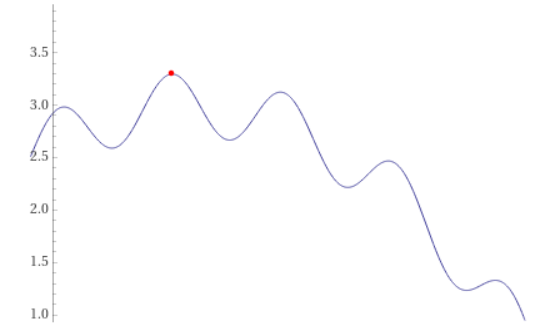

In [ ]:
import math
import random

In [ ]:
class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [0] * 16
    if randomize_genes:
     for i in range(8):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    number = int("".join(str(x) for x in self.genes), 2) / 2.**16 # sprytny sposób na konwersję wektora bitów do liczby całkowitej w jednej linijce
    return 3+0.2*math.cos(25*number-0.3)- (2*number-0.6)**2.
    #return 3 + math.pow(number, -1.*number) + 0.1*math.sin(100*number)
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,15)
    new_solution = Solution()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1

In [ ]:
# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution()
best_solution_adaptation = 0.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**16., ' (correct: 0.264828)')
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation, ' (correct:  3.29484)')

Epoch:  0 ; avg adaptation:  2.4207172974802886 ; best adaptation:  3.194943596371405  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  1 ; avg adaptation:  2.608053264603616 ; best adaptation:  3.1473565113955075  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  2 ; avg adaptation:  2.6546792238652017 ; best adaptation:  3.193885964006707  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  3 ; avg adaptation:  2.7297450254418316 ; best adaptation:  3.194943596371405  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  4 ; avg adaptation:  2.7398832879285187 ; best adaptation:  3.1948685477681864  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  5 ; avg adaptation:  2.7909702155964613 ; best adaptation:  3.185979668439966  best adaptation ever:  3.194943596371405  from iteration  0
Epoch:  6 ; avg adaptation:  2.819065196429374 ; best adaptation:  3.169461302140895  best adaptation ever:  3.194943

Teraz zobaczmy przebieg algorytmu:

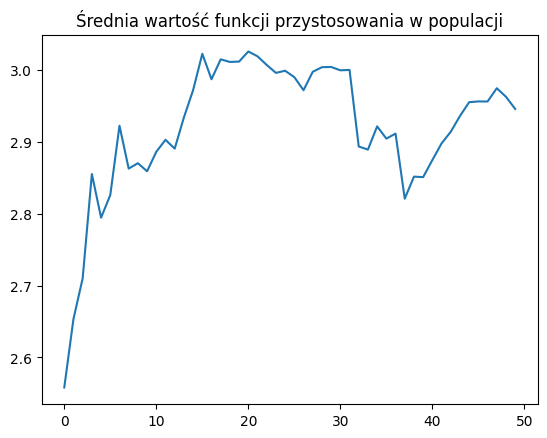

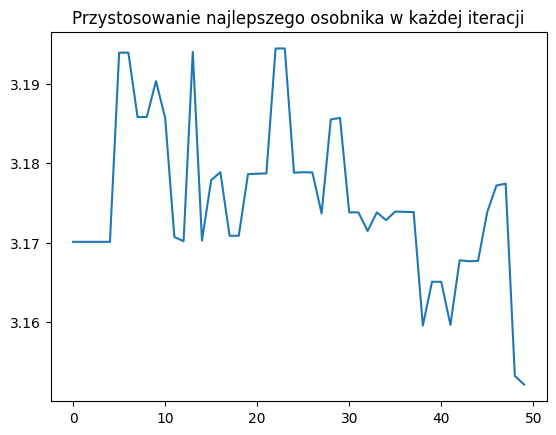

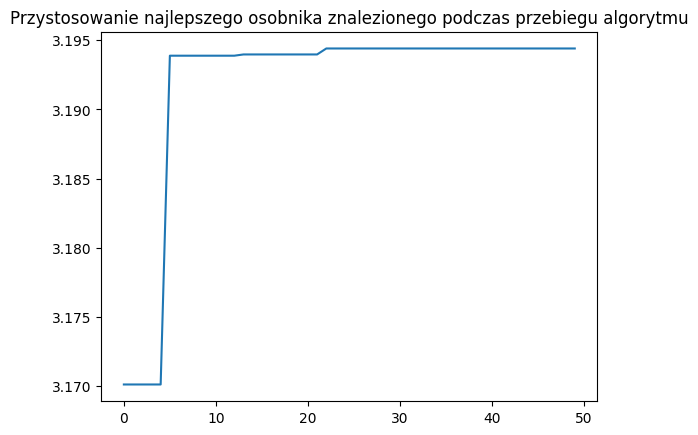

In [ ]:
import matplotlib.pyplot as plt

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w populacji")
plt.show()
print('    ')
plt.plot(bests_local)
plt.title("Przystosowanie najlepszego osobnika w każdej iteracji")
plt.show()
print('    ')
plt.plot(bests_global)
plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu algorytmu")
plt.show()

Przedstawiona implementacja algorytmu genetycznego ma wiele niedoskonałości. Należy też pamiętać, że jako algorytm niedeterministyczny, każde wywołanie algorytmu genetycznego może dać trochę inne wyniki.

## Zadania do samodzielnego wykonania

1.

Proszę zaproponować swoją implementację algorytmu genetycznego w celu znalezienia maksimum funkcji $f(x) = sin(100x+0.1) + x^{-x} + 0.2$ w przedziale $[0,1]$, dla $x=0$ proszę przyjąć $f(x) = 0$. Proszę porównać działanie algorytmu:

* Dla kodowania w naturalnym kodzie binarnym i w kodzie Graya

* Dla szansy mutacji wynoszącej 0, 0.1, 0.5 i 1.0

* Dla selekcji ruletkowej i dla selekcji progowej. W selekcji progowej dzielimy populację na dwie grupy: na $\gamma$% najlepszych i na pozostałych. Osobniki w grupie $\gamma$% najlepszych mają równą szansę na reprodukcję, pozostałe mają zerową szansę na reprodukcję. Proszę sprawdzić wyniki dla $\gamma$ wynoszącego 20 i 50.

Za każdym razem proszę podać średnie wyniki dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

2.

W naszej firmie są cztery działy: A, B, C i D. Generują różne zyski i różne koszty utrzymania, a ich efektywność jest wzajemnie od siebie zależna. Maksymalna ilość pracowników w każdym dziale przy obecnych warunkach to 255 ze względu na ograniczenia budżetu i przestrzeni biurowej. Funkcja miesięcznego zysku (po uwzględnieniu kosztów) w zależności od zatrudnionych w każdym dziale pracowników ma postać:

$Z(A, B, C, D) = 5000-\frac{600(A-20)^2(B-35)^2}{C}-(A-50)^2(D-48)^2+D$

Proszę zaproponować algorytm genetyczny (kodowanie problemu może być binarne, rzeczywistoliczbowe lub całkowitoliczbowe) i zaproponować wartość (A, B, C, D), dla której zyski firmy będą jak największe.

Zad 1

Naturalny kod binarny

In [ ]:
import math
import random

class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [0] * 16
    if randomize_genes:
     for i in range(8):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    number = int("".join(str(x) for x in self.genes), 2) / 2.**16
    return math.sin(100 * number + 0.1) + math.pow(number, -number) + 0.2
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,15)
    new_solution = Solution()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1

Kod graya

In [ ]:
import math
import random

class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [0] * 16
    if randomize_genes:
     for i in range(8):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    # konwersja kodu Graya na binarny
    binary_code = [self.genes[0]]
    for i in range(1, len(self.genes)):
        binary_code.append(self.genes[i] ^ binary_code[i-1])

    # konwersja binarnego kodu liczby na dziesiętny
    number = 0
    for i in range(len(binary_code)):
        number += binary_code[i] * 2**(len(binary_code)-i-1)

    return math.sin(100 * number + 0.1) + math.pow(number, -number) + 0.2
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,15)
    new_solution = Solution()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1

In [ ]:

# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution()
best_solution_adaptation = 0.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genesX, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**16.)
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation)

Epoch:  0 ; avg adaptation:  0.1419834833030989 ; best adaptation:  1.1761104537687361  best adaptation ever:  1.1761104537687361  from iteration  0
Epoch:  1 ; avg adaptation:  0.4923716308481029 ; best adaptation:  1.1649930696196382  best adaptation ever:  1.1761104537687361  from iteration  0
Epoch:  2 ; avg adaptation:  0.48293819062629273 ; best adaptation:  1.1761104537687361  best adaptation ever:  1.1761104537687361  from iteration  0
Epoch:  3 ; avg adaptation:  0.570435591986566 ; best adaptation:  1.1976429912180546  best adaptation ever:  1.1976429912180546  from iteration  3
Epoch:  4 ; avg adaptation:  0.4337009959718036 ; best adaptation:  1.1959650783460678  best adaptation ever:  1.1976429912180546  from iteration  3
Epoch:  5 ; avg adaptation:  0.4959757497064919 ; best adaptation:  1.1959650783460678  best adaptation ever:  1.1976429912180546  from iteration  3
Epoch:  6 ; avg adaptation:  0.42973868820733985 ; best adaptation:  1.1959650783460678  best adaptation e

Zad 2

In [ ]:
import math
import random

class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [1] * 4
    if randomize_genes:
     for i in range(4):
        self.genes[i] = random.randint(1, 255)

  # funkcja przystosowania:
  def get_adaptation(self):
    return 5000 - (600 * math.pow(self.genes[0] - 20, 2) * math.pow(self.genes[1] - 35, 2)) / self.genes[2] - math.pow(self.genes[0] - 50, 2)*math.pow(self.genes[3] - 48, 2) + self.genes[3]
  
  # krzyżowanie blend z innym osobnikiem:
  def crossover(self, other_solution):
    new_solution = Solution()
    for i in range(len(new_solution.genes)):
      noise = math.ceil(0.35 * abs(self.genes[i] - other_solution.genes[i]))
      new_solution.genes[i] = random.randint(min(self.genes[i], other_solution.genes[i]) - noise, max(self.genes[i], other_solution.genes[i]) + noise)
      new_solution.check_genes()
    return new_solution

  # mutacja przez delikatną zmianę losowego genu:
  def mutation(self):
    mutation_position = random.randint(0, 3)
    boundary = abs(math.ceil(0.1 * self.genes[mutation_position]))
    self.genes[mutation_position] += random.randint(-boundary, boundary)
    self.check_genes()

  def check_genes(self):
    for i in range(len(self.genes)):
      if self.genes[i] < 1:
        self.genes[i] = 1
      elif self.genes[i] > 255:
        self.genes[i] = 255


# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution()
best_solution_adaptation = 0.
best_iteration_found = 0

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

  # sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
  adaptations = [p.get_adaptation() for p in population]
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('Best solution: ', best_solution.genes)
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation)

---
Best solution:  [50, 35, 172, 150]
Found in iteration:  0
Largest function value found:  5150.0
